In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('clean_data.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 15 columns):
age               30161 non-null int64
workclass         30161 non-null object
fnlwgt            30161 non-null int64
education         30161 non-null object
education-num     30161 non-null int64
marital-status    30161 non-null object
occupation        30161 non-null object
relationship      30161 non-null object
race              30161 non-null object
sex               30161 non-null object
capital-gain      30161 non-null int64
capital-loss      30161 non-null int64
hours-per-week    30161 non-null int64
native-country    30161 non-null object
target            30161 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.5+ MB


In [6]:
data.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [7]:
data.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [8]:
data.relationship.unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [9]:
import seaborn as sns

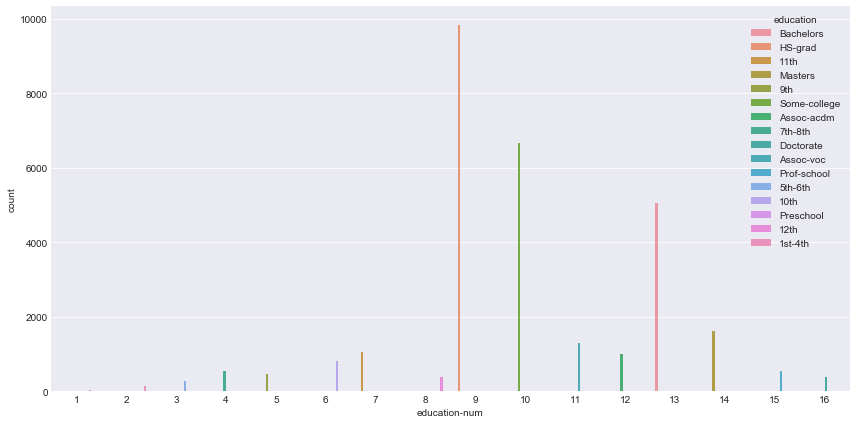

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x='education-num', hue='education', data=data)
plt.tight_layout()

In [15]:
data['marital-status'].unique()

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

In [18]:
work = pd.get_dummies(data['workclass'],drop_first=True)
#education = pd.get_dummies(df['education'],drop_first=True)
marital = pd.get_dummies(data['marital-status'],drop_first=True)
occupation = pd.get_dummies(data['occupation'],drop_first=True) 
relation = pd.get_dummies(data['relationship'],drop_first=True)
race = pd.get_dummies(data['race'],drop_first=True)
sex = pd.get_dummies(data['sex'],drop_first=True)

new_data = pd.concat([data, work, marital, occupation, relation, race, sex], axis = 1)
SVM_data = new_data.drop(['workclass', 'education','marital-status', 
                          'occupation', 'relationship', 'race', 'sex',
                          'native-country',], axis=1)

In [20]:
SVM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 42 columns):
age                      30161 non-null int64
fnlwgt                   30161 non-null int64
education-num            30161 non-null int64
capital-gain             30161 non-null int64
capital-loss             30161 non-null int64
hours-per-week           30161 non-null int64
target                   30161 non-null int64
Local-gov                30161 non-null uint8
Private                  30161 non-null uint8
Self-emp-inc             30161 non-null uint8
Self-emp-not-inc         30161 non-null uint8
State-gov                30161 non-null uint8
Without-pay              30161 non-null uint8
Married-AF-spouse        30161 non-null uint8
Married-civ-spouse       30161 non-null uint8
Married-spouse-absent    30161 non-null uint8
Never-married            30161 non-null uint8
Separated                30161 non-null uint8
Widowed                  30161 non-null uint8
Armed-Forces     

In [24]:
X = SVM_data.drop('target', axis=1)
y = SVM_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.svm import SVC

In [22]:
svc_model = SVC()

In [25]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
pred = svc_model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6735   86]
 [2167   61]]
             precision    recall  f1-score   support

          0       0.76      0.99      0.86      6821
          1       0.41      0.03      0.05      2228

avg / total       0.67      0.75      0.66      9049



The result is not good enough
<br/><br/>
## Grid search for better parameters

In [28]:
from sklearn.grid_search import GridSearchCV

In [29]:
para = {"C":[0.1,1,10,100], "gamma":[1, 0.1, 0.01, 0.001]}

In [31]:
grid = GridSearchCV(SVC(), param_grid=para)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [32]:
grid_pred = grid.predict(X_test)

In [33]:
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[6795   26]
 [2211   17]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      6821
          1       0.40      0.01      0.01      2228

avg / total       0.67      0.75      0.65      9049



The svm model for this data set performaces pretty bad